In [625]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

nagents = 10
ncycles = 200
ndemand0 = 20
probnew = 0

# load interactions
datafolder = r"C:\Users\chadw\eclipse-workspace\EM426-ABM"
aname = "agent_report_{}_{}_{}_{}.txt".format(nagents,ncycles,ndemand0,probnew)
ename = "interaction_report_{}_{}_{}_{}.txt".format(nagents,ncycles,ndemand0,probnew)
mname = "montecarlo_report_{}_{}_{}_{}.txt".format(nagents,ncycles,ndemand0,probnew)
#aname = "agent_report.txt"
#ename = "interaction_report.txt"

#%matplotlib inline

In [626]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

def gini_norm(actual):
    return gini_normalized(actual,np.ones(actual.shape)*sum(actual)/len(actual))

In [627]:
def diversity(x):
    return (1 - np.sum((x/np.sum(x))**2))

In [628]:
# read in collaboration list
mcdf = pd.read_csv(Path(datafolder,mname),header=None)
mcdf = mcdf.iloc[:,np.where(~mcdf.isna().any())[0].tolist()]

metrics = mcdf.copy()
metrics['total'] = mcdf.apply(np.sum,axis=1)
metrics['average'] = mcdf.apply(np.mean,axis=1)
metrics['entropy'] = stats.entropy(mcdf.apply(pd.value_counts,axis=1).fillna(0),axis=1)
metrics['diversity'] = mcdf.apply(diversity, axis=1)
metrics['skewness'] = mcdf.apply(stats.skew,axis=1)
metrics['kurtosis'] = mcdf.apply(stats.kurtosis,axis=1)


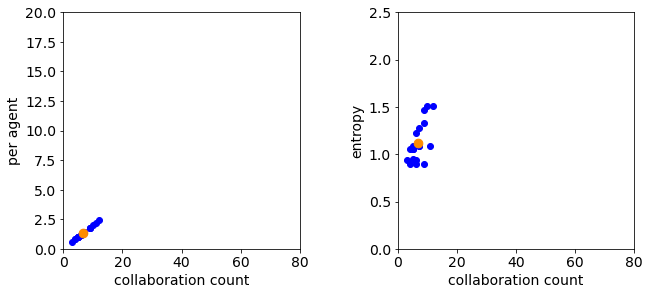

In [629]:
ind = 0

clrs1 = ['blue','limegreen','teal','gray']
clrs2 = ['darkorange','y','gold','pink']

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

fig, axs = plt.subplots(1,2,sharex=True,figsize=(10,10))
x = metrics['total']/2  # collaboration count is 2x unique collaborations
y1 = metrics['average']
y2 = metrics['entropy']

xl = [0,80]
y1l = [0,20]
y2l = [0,2.5]
        
axs[0].scatter(x,y1,c=clrs1[ind])
axs[0].scatter([x.mean()],[y1.mean()],s=75,c=clrs2[ind])

axs[1].scatter(x,y2,c=clrs1[ind])
axs[1].scatter([x.mean()],[y2.mean()],s=75,c=clrs2[ind])

axs[0].set_ylim(y1l)
axs[0].set(aspect=np.diff(xl)/np.diff(y1l))
axs[1].set_ylim(y2l)
axs[1].set(aspect=np.diff(xl)/np.diff(y2l))
axs[0].set_ylabel('per agent')
axs[1].set_ylabel('entropy')

for ax in axs:
    #ax.set(adjustable='datalim',aspect=.5)
    ax.set_xlim(xl)
    ax.set_xlabel('collaboration count')
    
fig.tight_layout(pad=3.0)

Text(0, 0.5, 'Frequency')

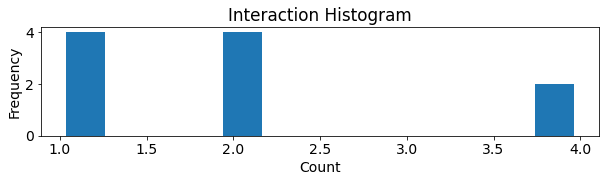

In [578]:
pd.read_csv(Path(datafolder,ename),names=['Agent1','Agent2','weight']).hist(column='weight', grid=False,figsize=(10,2), rwidth=.75)
plt.title('Interaction Histogram')
plt.xlabel('Count')
plt.ylabel('Frequency')


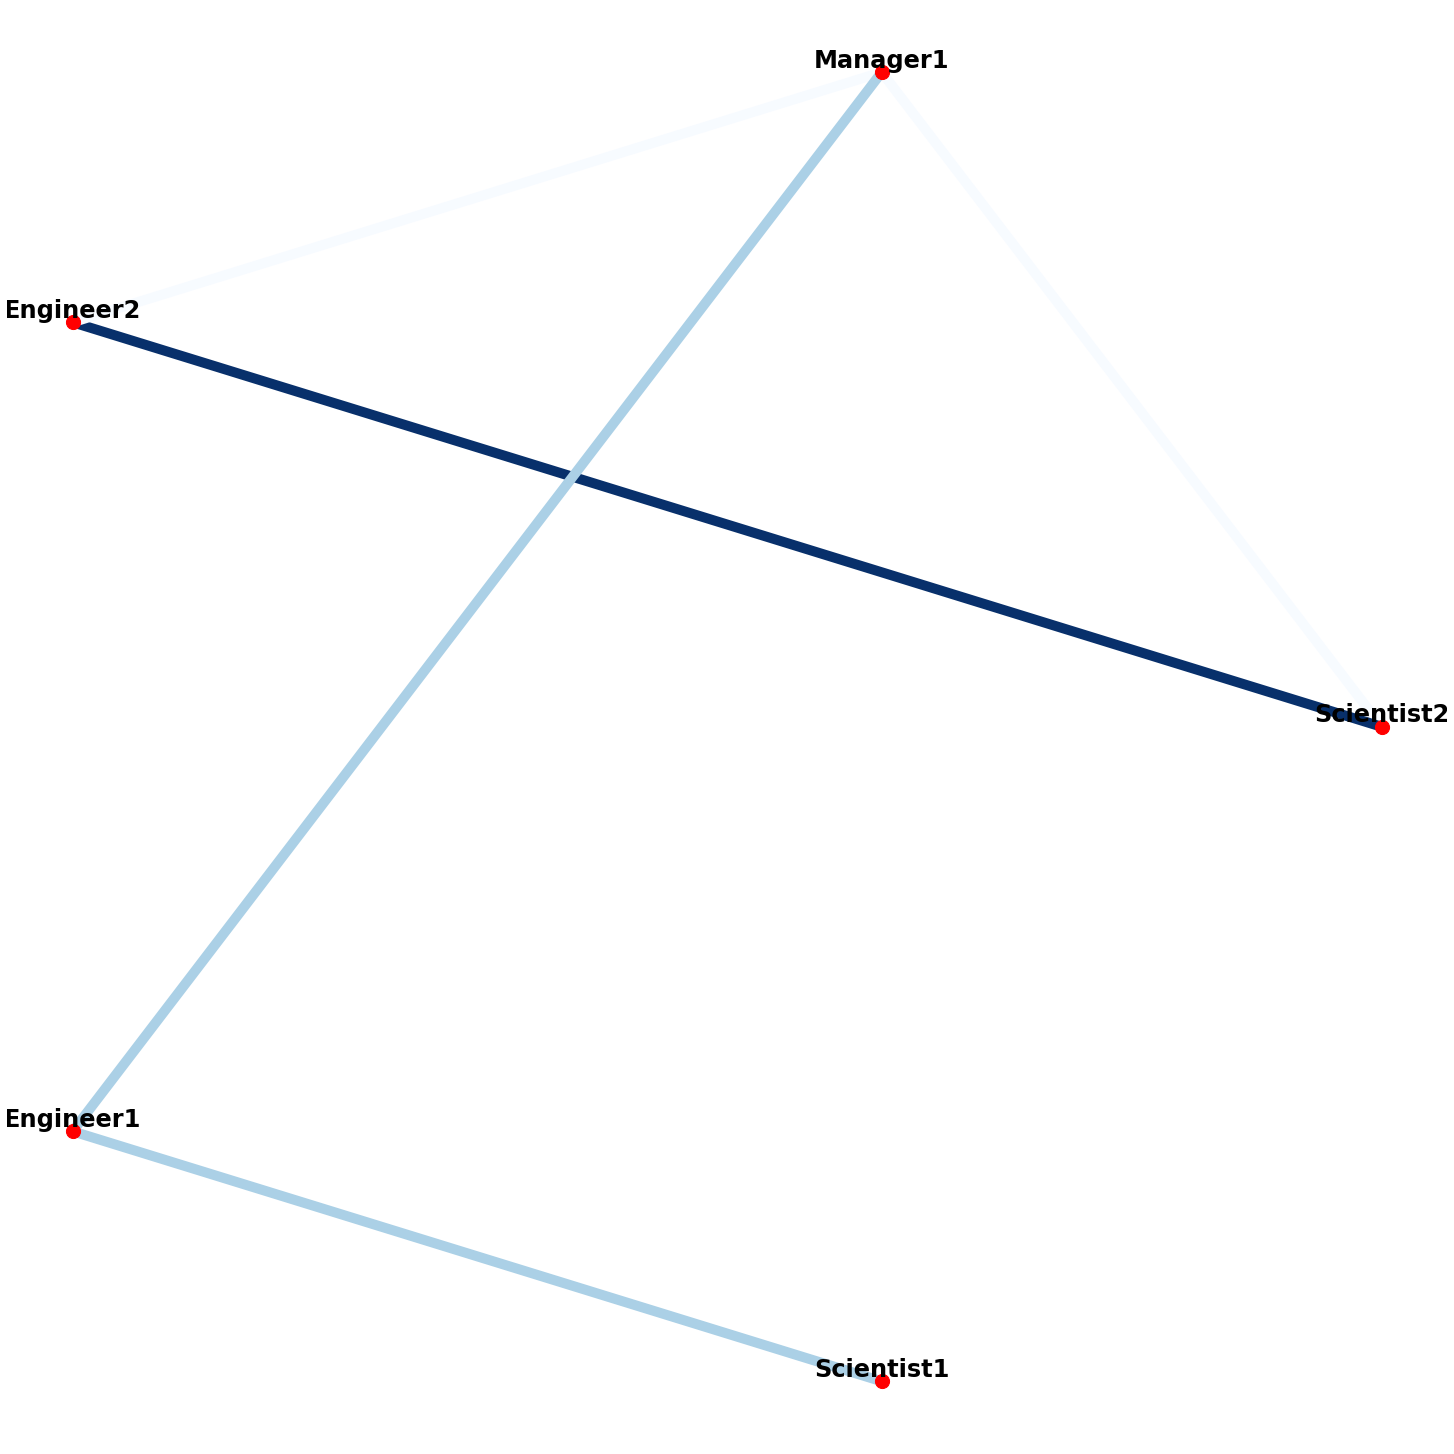

In [519]:
G = nx.Graph()
nodes = pd.read_csv(Path(datafolder,aname),header=None,names=['node'])
data = nodes.set_index('node').to_dict('index').items()
G.add_nodes_from(data)
#nx.draw(G,with_labels=True);

edges = pd.read_csv(Path(datafolder,ename),header=None,names=['node1','node2','weight'])
G = nx.from_pandas_edgelist(edges, 'node1', 'node2', edge_attr=True)
nodes = pd.read_csv(Path(datafolder,aname),header=None,names=['node'])
data = nodes.set_index('node').to_dict('index').items()
G.add_nodes_from(data)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

plt.figure(figsize=(20,20))
h=nx.draw_circular(G,#pos,
                    node_color='r', 
                    node_size=200,
                    font_size=24,
                    edgelist=edges, 
                    edge_color=weights, 
                    width=10.0, 
                    edge_cmap=plt.cm.Blues,
                    with_labels=True, 
                    font_weight='bold', 
                    verticalalignment='bottom')
plt.savefig('edges.png')

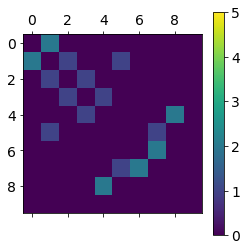

In [470]:
plt.matshow(nx.adjacency_matrix(G).todense(), vmin=0,vmax=5,cmap='viridis')
plt.colorbar()

In [446]:
y1.min()

1.6